# Holiday Package Prediction

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [76]:
# read file csv into dataframe
df = pd.read_csv('Travel.csv')
# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Data Description

- **CustomerID** : Unique customer ID
- **ProdTaken** : Product taken or not (0: No, 1: Yes)
- **Age** : Age of customer
- **TypeofContact** : How customer was contacted (Company Invited or Self Inquiry)
- **CityTier** : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- **DurationOfPitch** : Duration of the pitch by a salesperson to the customer
- **Occupation** : Occupation of customer
- **Gender** : Gender of customer
- **NumberOfPersonVisiting** : Total number of persons planning to take the trip with the customer
- **NumberOfFollowups** : Total number of follow-ups has been done by the salesperson after the sales pitch
- **ProductPitched** : Product pitched by the salesperson
- **PreferredPropertyStar** : Preferred hotel property rating by customer
- **MaritalStatus** : Marital status of customer
- **NumberOfTrips** : Average number of trips in a year by customer
- **Passport** : The customer has a passport or not (0: No, 1: Yes)
- **PitchSatisfactionScore** : Sales pitch satisfaction score
- **OwnCar** : Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting** : Total number of children with age less than 5 planning to take the trip with the customer
- **Designation** : Designation of the customer in the current organization
- **MonthlyIncome** : Gross monthly income of the customer

In [77]:
# view 5 rows sample of data
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [78]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [79]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [80]:
# proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

TypeofContact
Self Enquiry       70.820481
Company Invited    29.179519
Name: proportion, dtype: float64
---------------------------
Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64
---------------------------
Gender
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: proportion, dtype: float64
---------------------------
ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64
---------------------------
MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64
---------------------------
Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: fl

In [81]:
# check duplicate rows
df.drop('CustomerID', axis=1).duplicated().any()
duplicate_rows = df.drop('CustomerID', axis=1).duplicated().sum()
print(format(duplicate_rows))

141


In [82]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


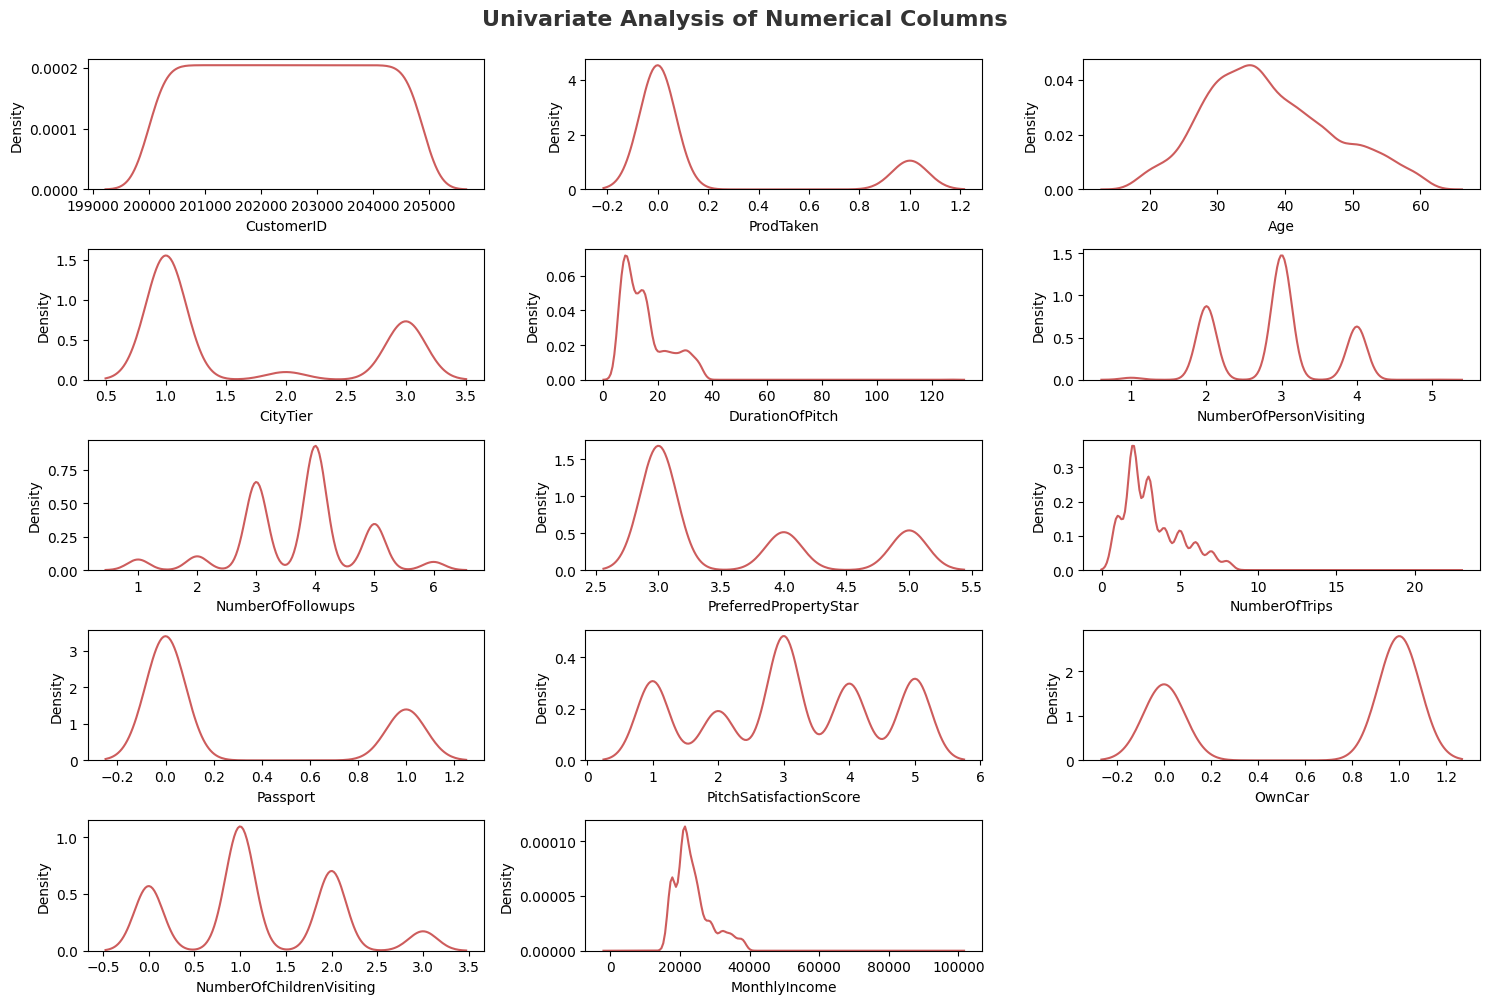

In [83]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    


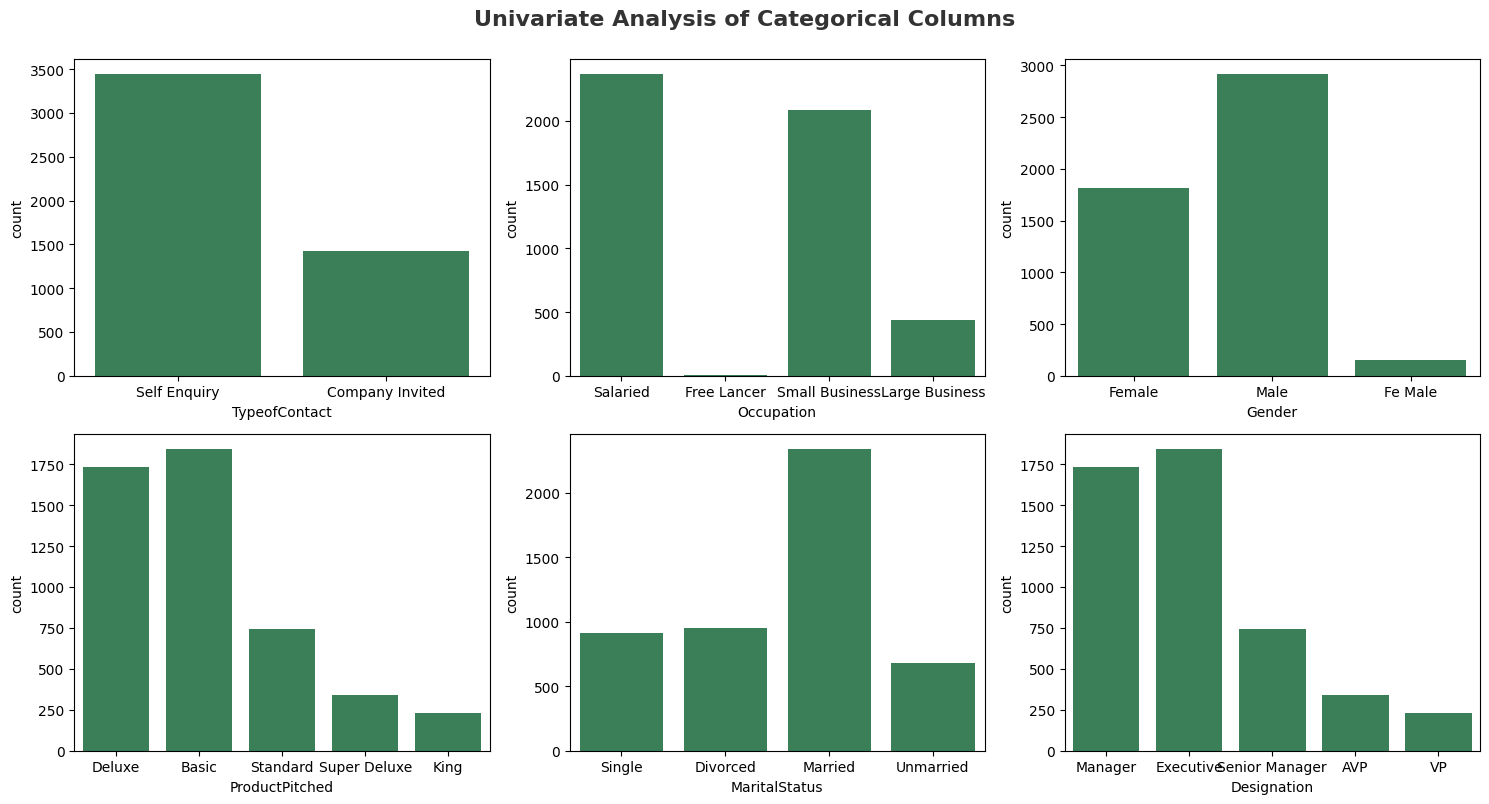

In [84]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()
    
# save plot


From the visualization results above, it can be concluded that:
- The `TypeofContact` column is dominated (data proportion more than 50%) by Self Inquiry.
- The `Occupation` column is dominated by Salaried and Small Business, but the number of Free Lancers is too few so they can be deleted later.
- In the `Gender` column there are more males than females. Apart from that, there was an error in writing the Fe Male category which should have been Female.
- The `ProductPitched` and `Designation` columns are dominated by 2 categories.
- The `MaritalStatus` column is dominated by Married status. Then the statuses Single and Unmarried can be interpreted the same way so they can be combined.

## Multivariate Analysis

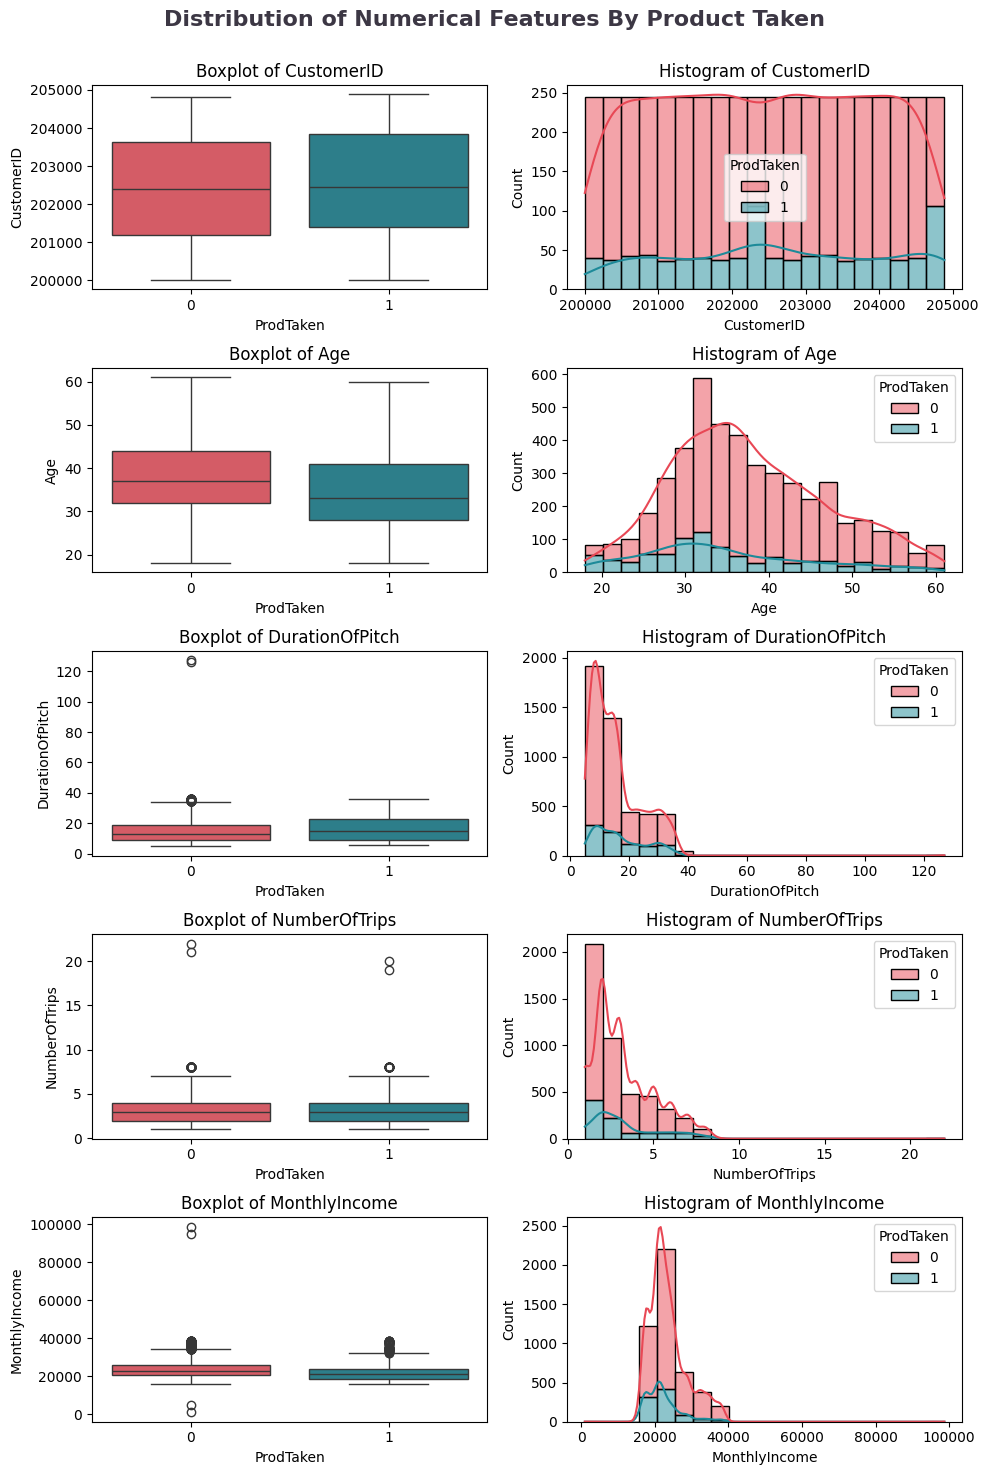

In [85]:
# EDA Numerical Features by Target
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)


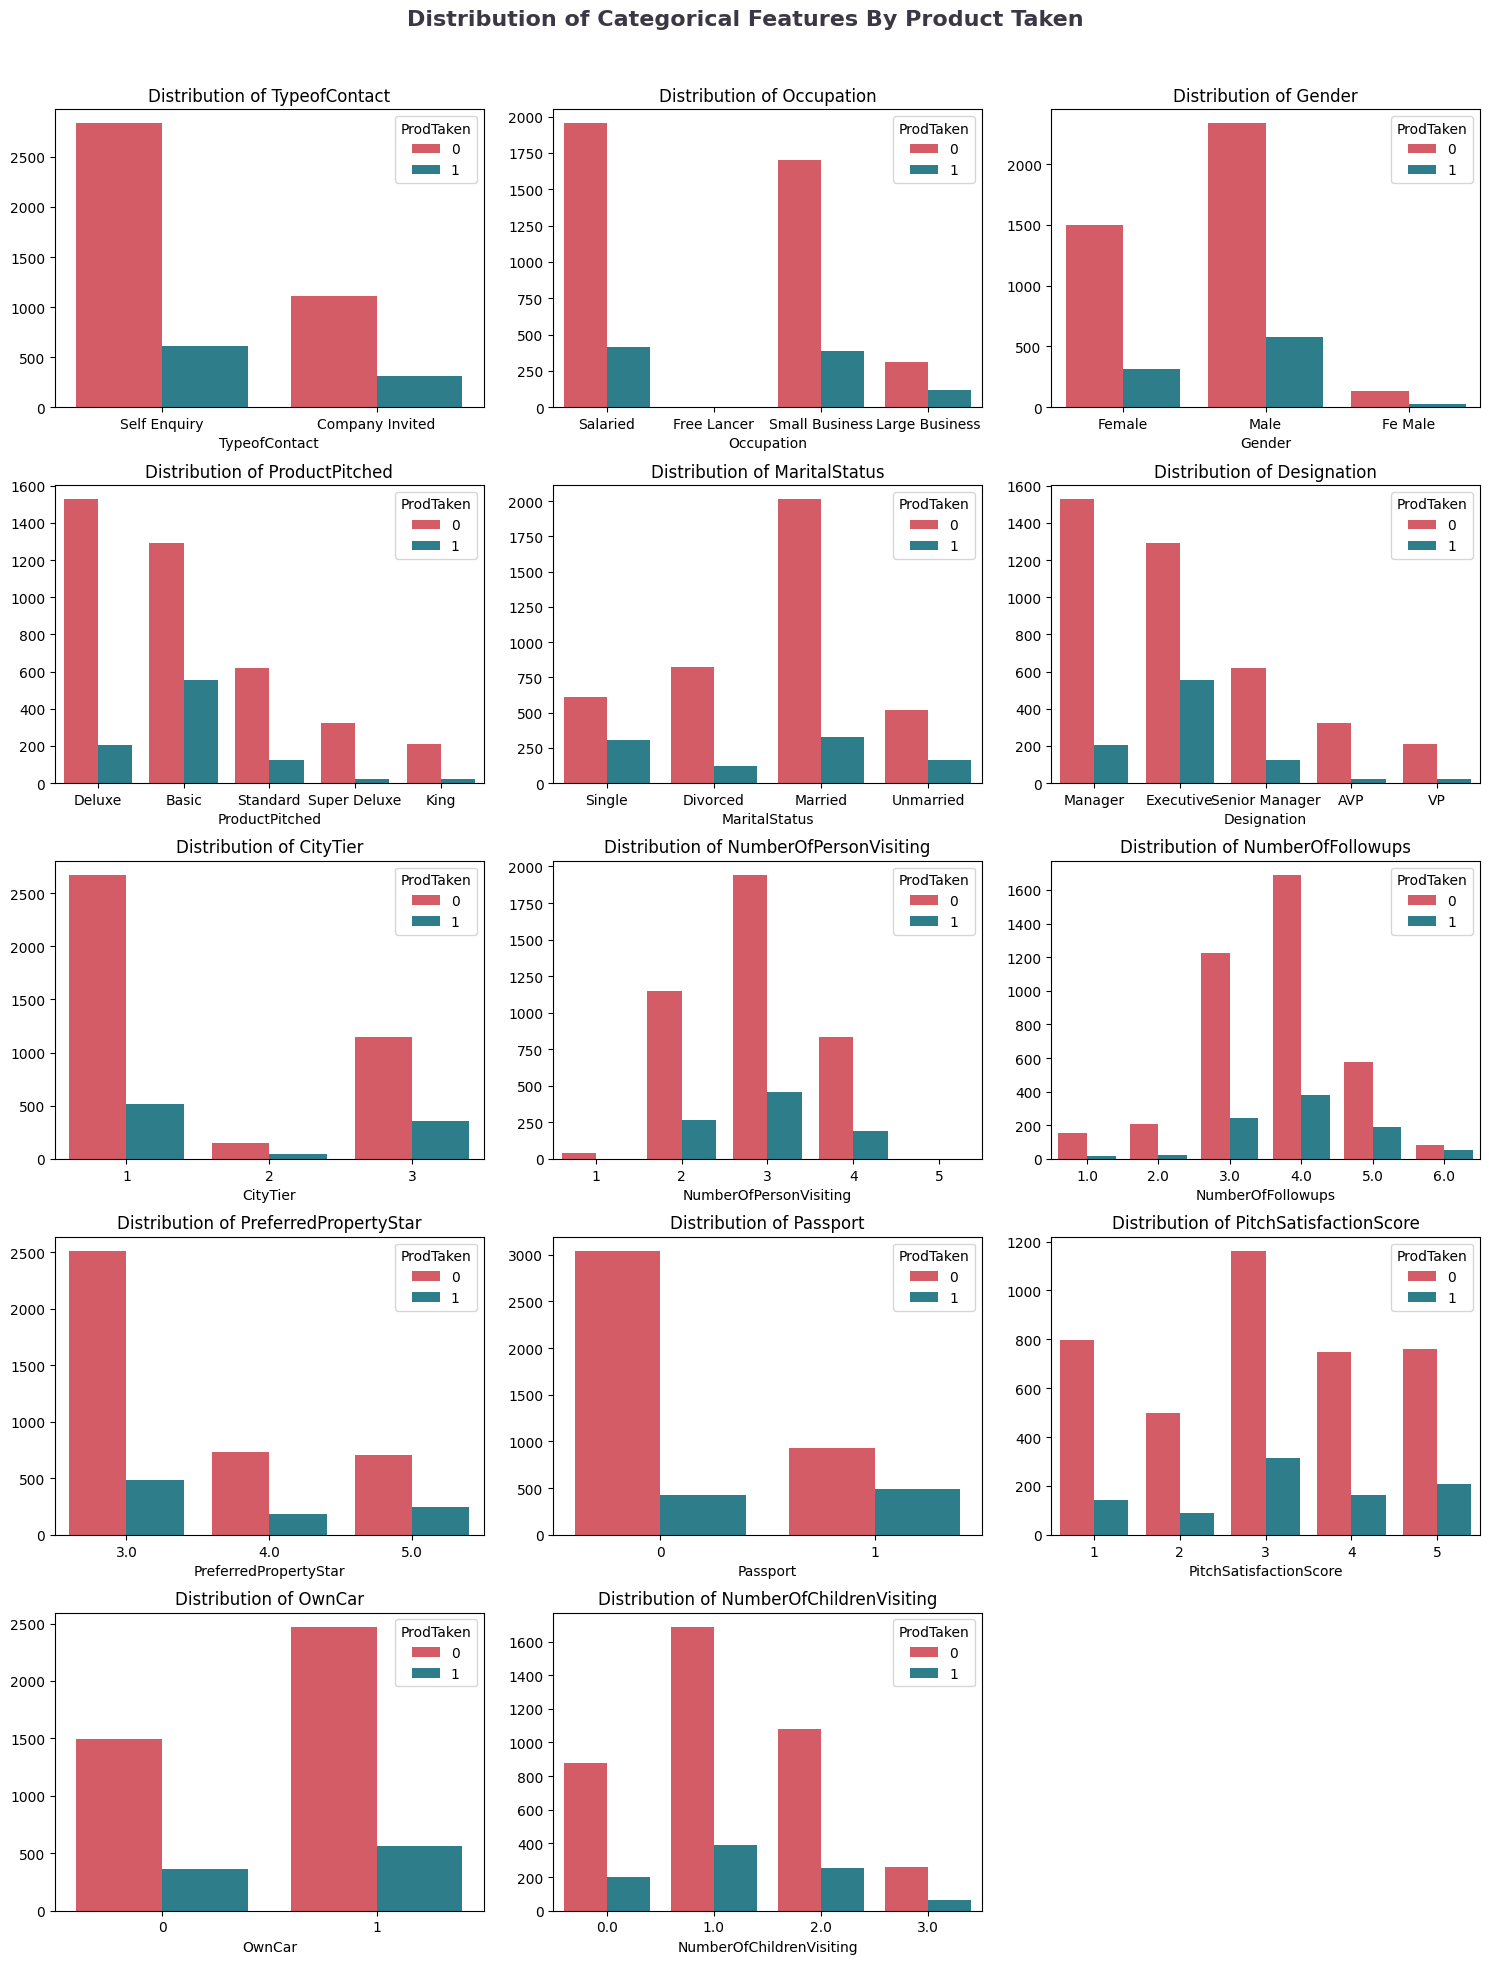

In [86]:
# EDA Categorical Features by Target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)


In [87]:
# check correlation categorical columns to target
#H0: The categorical column is not correlated with the target
# H1 : The categorical column is correlated with the target

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


In [88]:
# check proportion target
prop_target = df['ProdTaken'].value_counts(normalize=True) * 100
print(round(prop_target[0], 1))
print(round(prop_target[1], 1))

81.2
18.8


# Business Insight

In [89]:
# copy dataframe
df2 = df.copy()

In [90]:
df_product = df2.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
df_product = df_product[df_product.ProdTaken==1].reset_index(drop=True)
df_product['%']=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product = df_product.sort_values(by='%',ascending=False)
df_product

,ProductPitched,ProdTaken,TotalCust,CustomerID,%
0,Basic,1,552,1842,29.97
3,Standard,1,124,742,16.71
1,Deluxe,1,204,1732,11.78
2,King,1,20,230,8.70
4,Super Deluxe,1,20,342,5.85


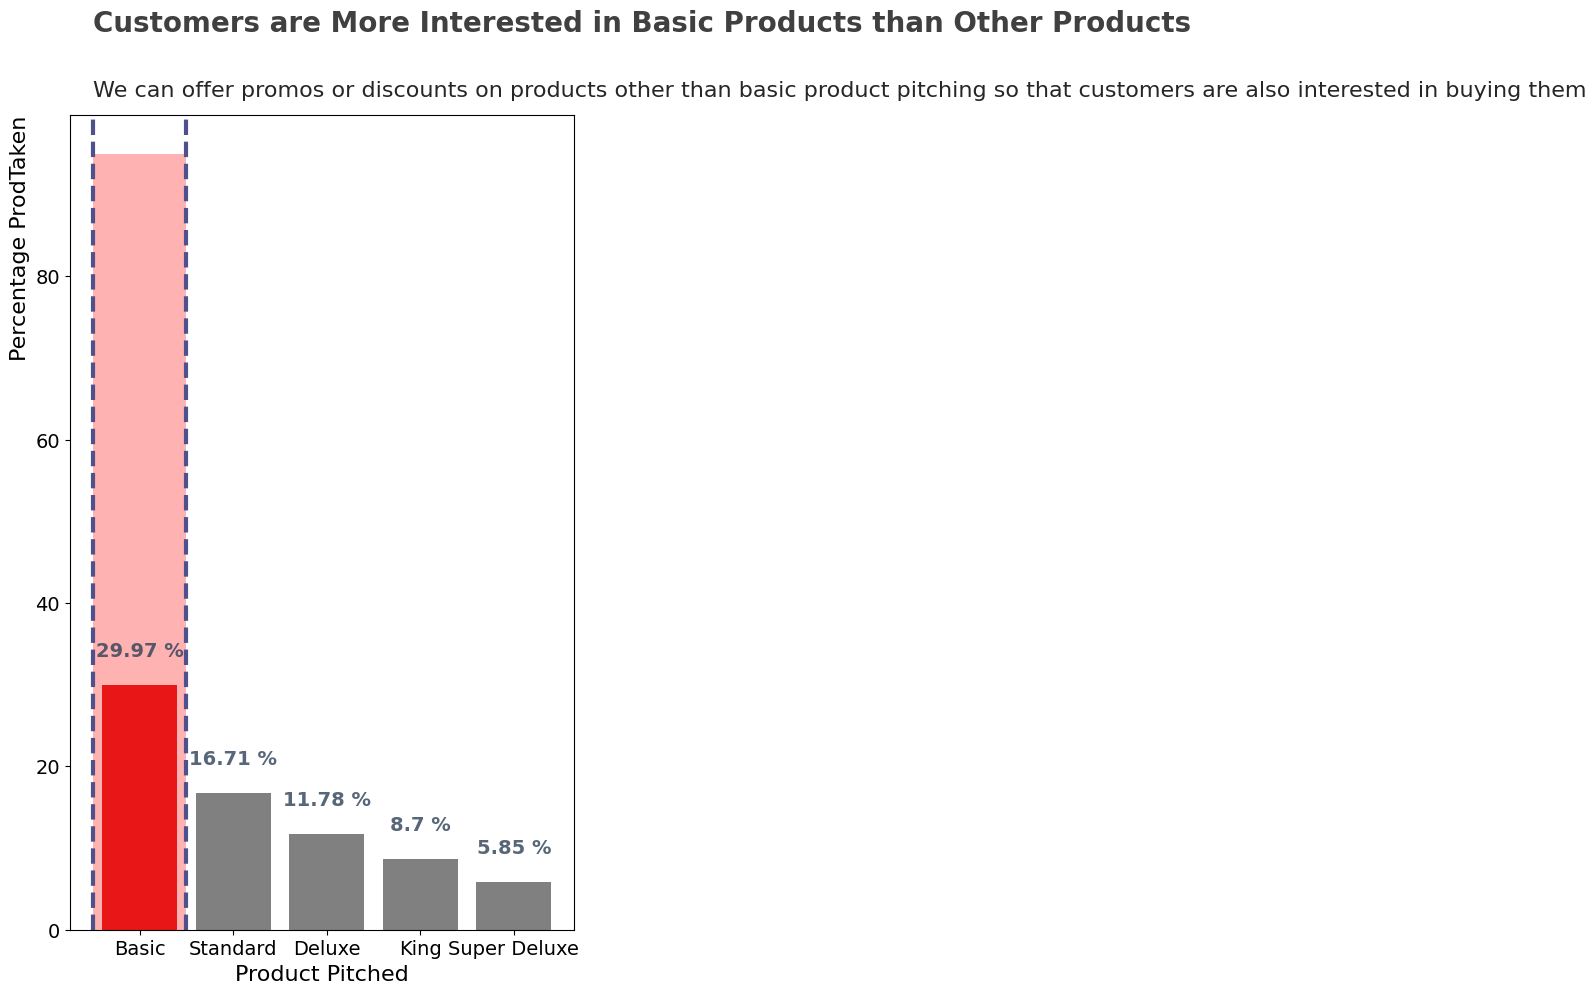

In [91]:
plt.figure(figsize=(12,10))

sns.barplot( x='ProductPitched',y='%',data=df_product, palette=['grey'])
sns.barplot( x='ProductPitched',y=[29.97,0,0,0,0],data=df_product, palette=['r'])

plt.xlabel('Product Pitched', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[95]], colors='rgb 144, 122, 214', alpha=0.3)

data_bars = df_product.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Customers are More Interested in Basic Products than Other Products', 
        x=-0.5, y=110, fontsize=20, fontweight='bold', alpha =.75)

plt.text(s='We can offer promos or discounts on products other than basic product pitching so that customers are also interested in buying them',
        x=-0.5, y=102, fontsize=16, alpha =.85)


plt.tight_layout()
plt.show()


In [92]:
followup_total = pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken==1].reset_index(drop=True)
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,1,20,11.36
1,2.0,1,24,10.48
2,3.0,1,244,16.64
3,4.0,1,379,18.33
4,5.0,1,191,24.87
5,6.0,1,54,39.71


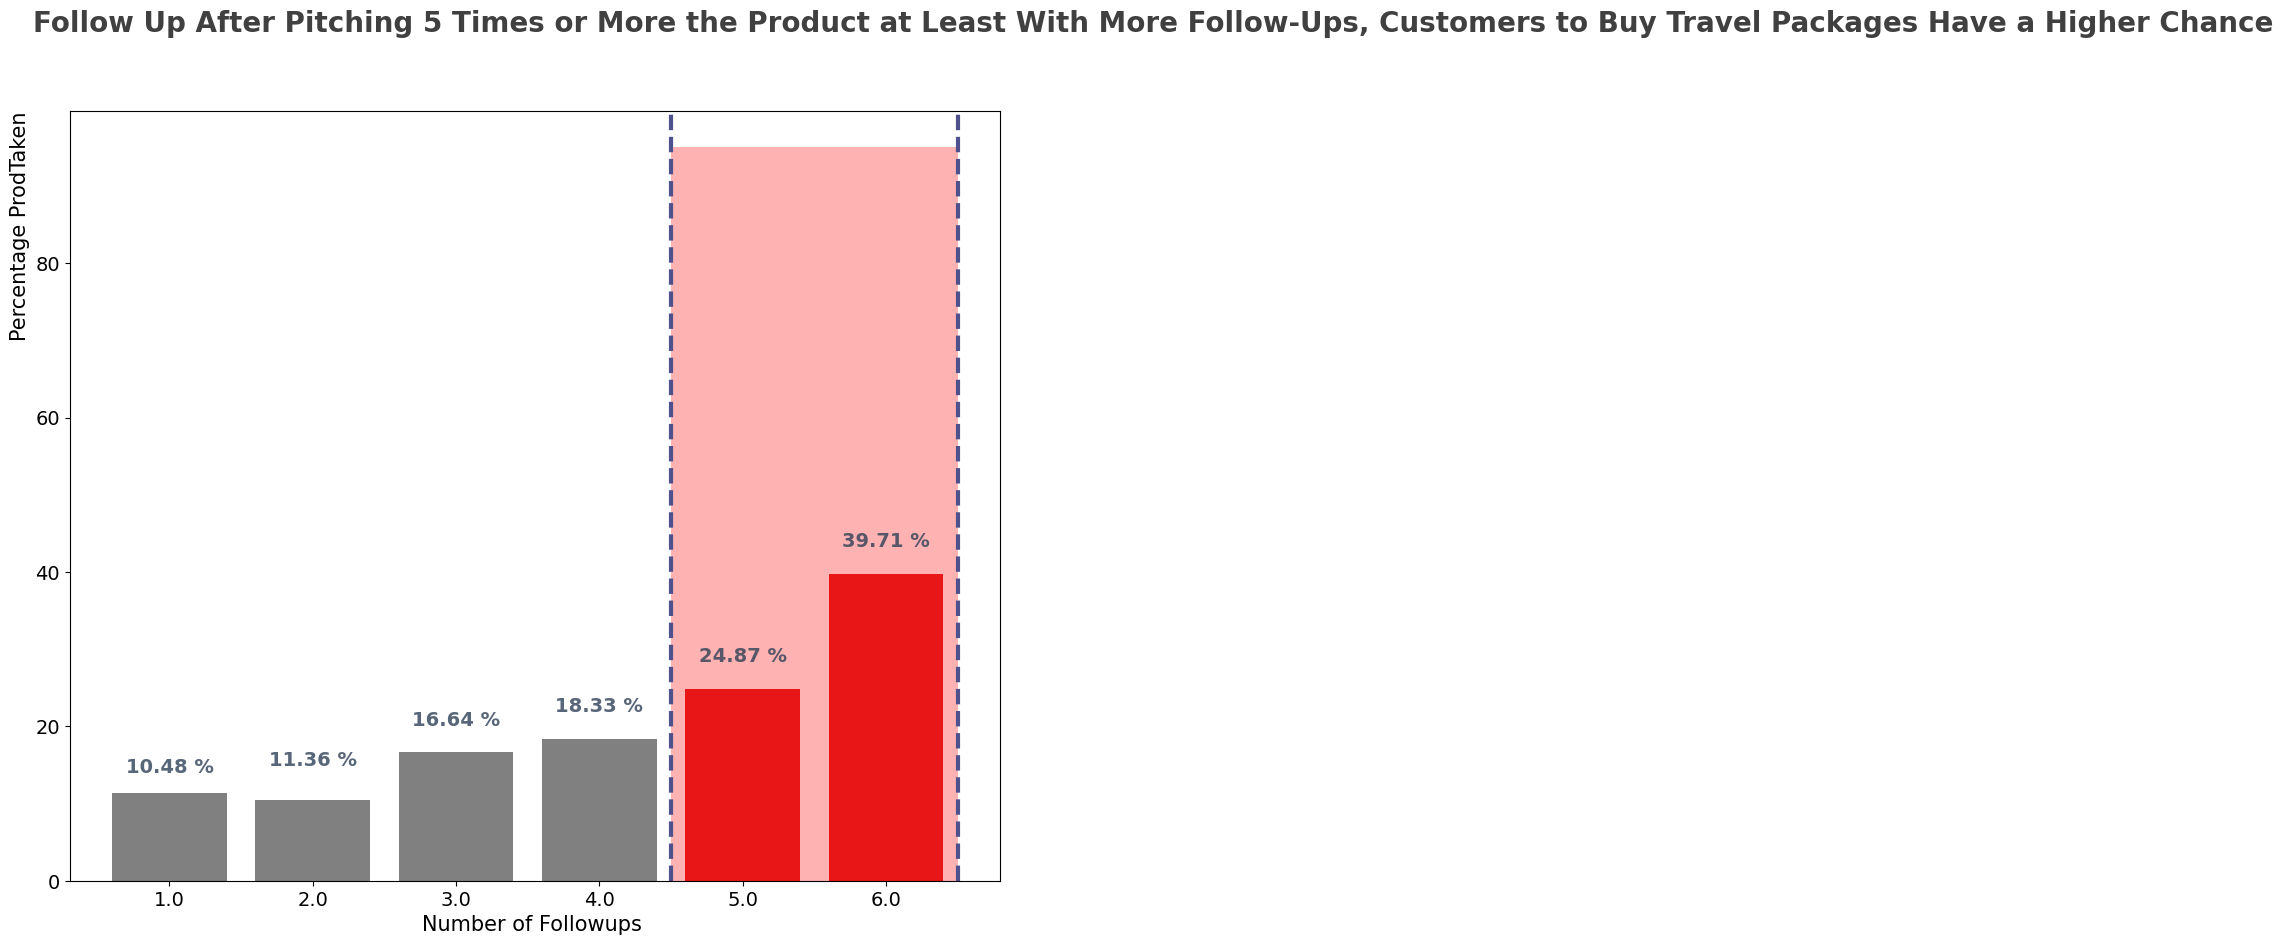

In [93]:
plt.figure(figsize=(12,10))

sns.barplot( x='NumberOfFollowups',y='PercCust',data=df_followups, palette=['grey'])
sns.barplot( x='NumberOfFollowups',y=[0,0,0,0,24.87,39.71],data=df_followups, palette=['r'])
plt.xlabel('Number of Followups ', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=3.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=5.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(3.5, 6,0.5 ), [[95]], colors='rgb 144, 122, 214', alpha=0.3)

data_bars = df_followups.sort_values('PercCust',ascending=True)['PercCust'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Follow Up After Pitching 5 Times or More the Product at Least With More Follow-Ups, Customers to Buy Travel Packages Have a Higher Chance', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)

plt.tight_layout()
plt.show()


In [94]:
print('Age data is start from {} to {}'.format(int(df2['Age'].min()), int(df2['Age'].max())))

Age data is start from 18 to 61


In [95]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Youth'
    elif x<=45:
        return 'Adult'
    else:
        return 'Elderly'
    
df2['AgeGroup'] = df2['Age'].apply(lambda x : age_group(x))
age_group = df2.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
             .merge(df2.groupby(['AgeGroup'])['CustomerID'].count().reset_index(name='TotalCust'),on='AgeGroup')

df_product = df_product.sort_values(by='%',ascending=False)
age_group['%']= round(age_group.TotalCust_x/age_group.TotalCust_y*100,2)
age_group = age_group[age_group.ProdTaken==1].sort_values('%',ascending=False).reset_index(drop=True)
age_group

,AgeGroup,ProdTaken,TotalCust_x,TotalCust_y,%
0,Youth,1,143,347,41.21
1,Adult,1,589,3341,17.63
2,Elderly,1,188,1200,15.67


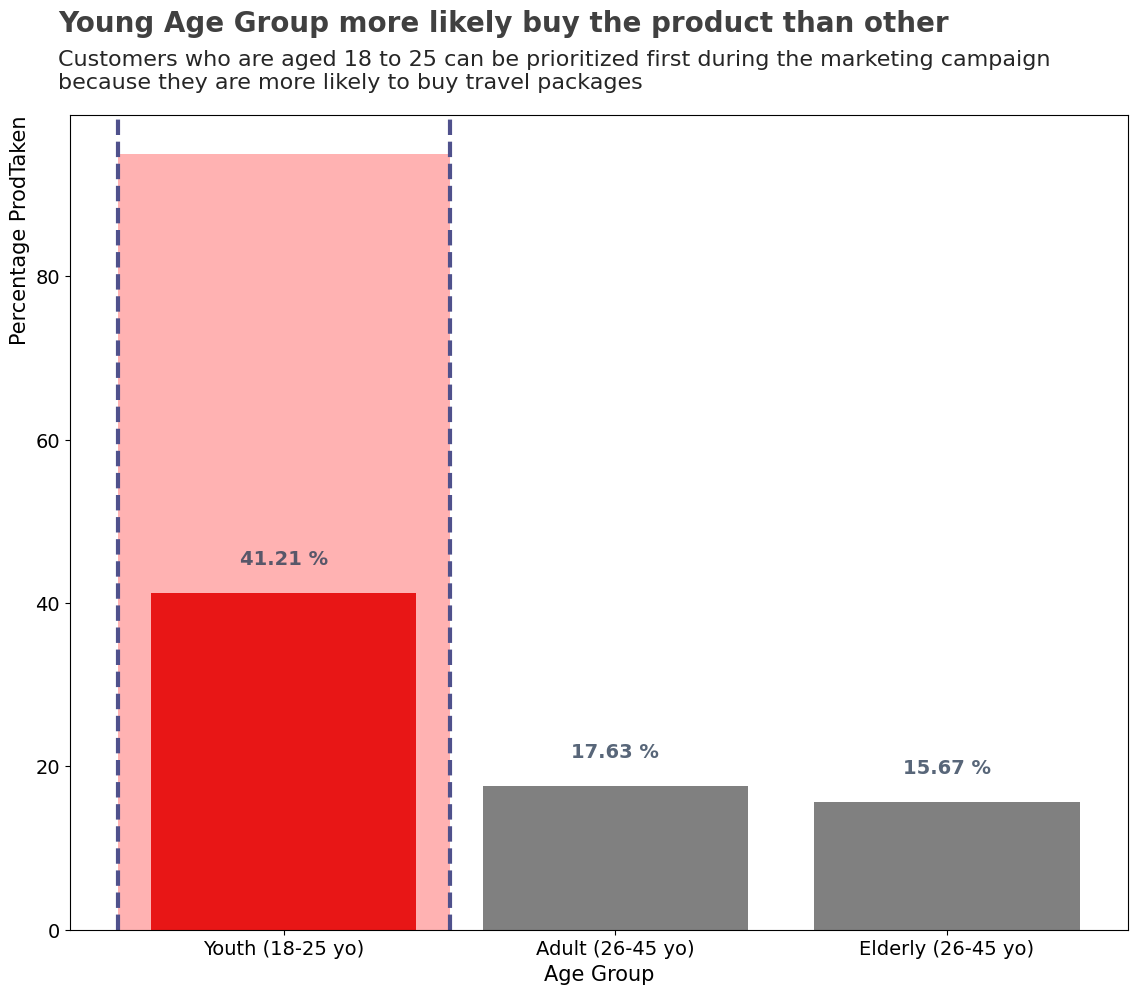

In [96]:
plt.figure(figsize=(12,10))

sns.barplot( x='AgeGroup',y='%',data=age_group, palette=['grey'])
sns.barplot( x='AgeGroup',y=[41.21,0,0],data=age_group, palette=['r'])

plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks([0,1,2],['Youth (18-25 yo)','Adult (26-45 yo)','Elderly (26-45 yo)'],size=14)


plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 0.6,0.5 ), [[95]], colors='rgb 144, 122, 214', alpha=0.3)

data_bars = age_group.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s="Young Age Group more likely buy the product than other", 
        x=-0.68, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='Customers who are aged 18 to 25 can be prioritized first during the marketing campaign\nbecause they are more likely to buy travel packages',
        x=-0.68, y=103, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()

plt.tight_layout()
plt.show()


In [97]:
df2.drop_duplicates(inplace=True)

In [98]:
_all = df2.groupby('DurationOfPitch')[['ProdTaken']].count()
yes = df2[df2['ProdTaken']==1].groupby('DurationOfPitch')[['ProdTaken']].count()
semua = yes.merge(_all,on='DurationOfPitch',how='left')
semua['%']=round((semua['ProdTaken_x']*100/semua['ProdTaken_y']),2)
semua.reset_index(inplace=True)#
# semua.sort_values(by='%',ascending=False,inplace=True)
semua = semua.head(30)
semua.iloc[13:26]

,DurationOfPitch,ProdTaken_x,ProdTaken_y,%
13,19.0,21,57,36.84
14,20.0,19,65,29.23
15,21.0,16,73,21.92
16,22.0,23,89,25.84
17,23.0,21,79,26.58
18,24.0,16,70,22.86
19,25.0,14,73,19.18
20,26.0,12,72,16.67
21,27.0,14,72,19.44
22,28.0,17,61,27.87


In [99]:
f_all = df2.groupby('NumberOfFollowups')[['ProdTaken']].count()
f_yes = df2[df2['ProdTaken']==1].groupby('NumberOfFollowups')[['ProdTaken']].count()
f_semua = f_yes.merge(f_all,on='NumberOfFollowups',how='left')
f_semua['%']=round((f_semua['ProdTaken_x']*100/f_semua['ProdTaken_y']),2)
f_semua.reset_index(inplace=True)#
f_semua.sort_values(by='%',ascending=False,inplace=True)
f_semua

,NumberOfFollowups,ProdTaken_x,ProdTaken_y,%
5,6.0,54,136,39.71
4,5.0,191,768,24.87
3,4.0,379,2068,18.33
2,3.0,244,1466,16.64
0,1.0,20,176,11.36
1,2.0,24,229,10.48


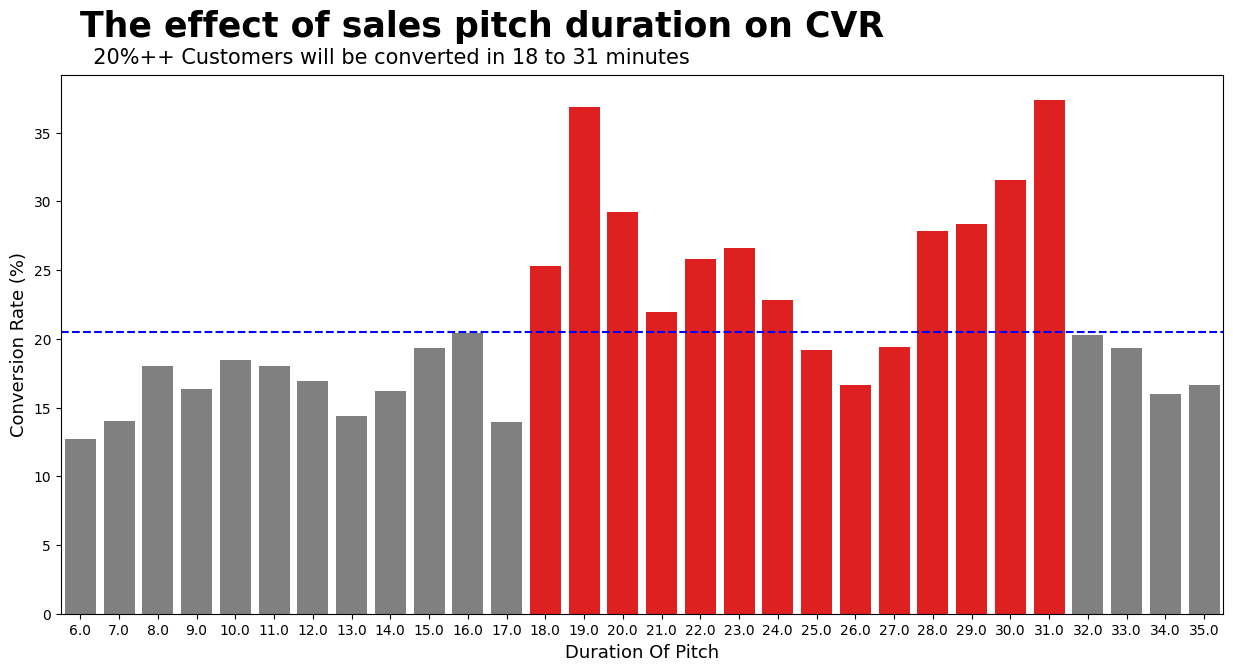

In [100]:
plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
sns.barplot(x='DurationOfPitch',y='%',data=semua,orient='v',order=semua['DurationOfPitch'],color='grey',saturation=0.3)
sns.barplot(x='DurationOfPitch',y='%',data=semua.iloc[12:26],orient='v',order=semua['DurationOfPitch'],color='r')
plt.ylabel('Conversion Rate (%)',size=13)
plt.xlabel('Duration Of Pitch',size=13)
plt.axhline(20.5, linestyle='dashed',color='b')
plt.text(0,42,'The effect of sales pitch duration on CVR',size=25,family='sans',weight='bold')
plt.text(0,40,s='  20%++ Customers will be converted in 18 to 31 minutes',fontdict=({'size':15,'family':'sans'}))
plt.show()

In [101]:
df_city = df2.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
df_city = df_city[df_city.ProdTaken==1].reset_index(drop=True)
df_city['%']=round(df_city.TotalCust/df_city.CustomerID*100,2)
df_city = df_city.sort_values(by='%',ascending=False).reset_index(drop=True)
df_city

,CityTier,ProdTaken,TotalCust,CustomerID,%
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


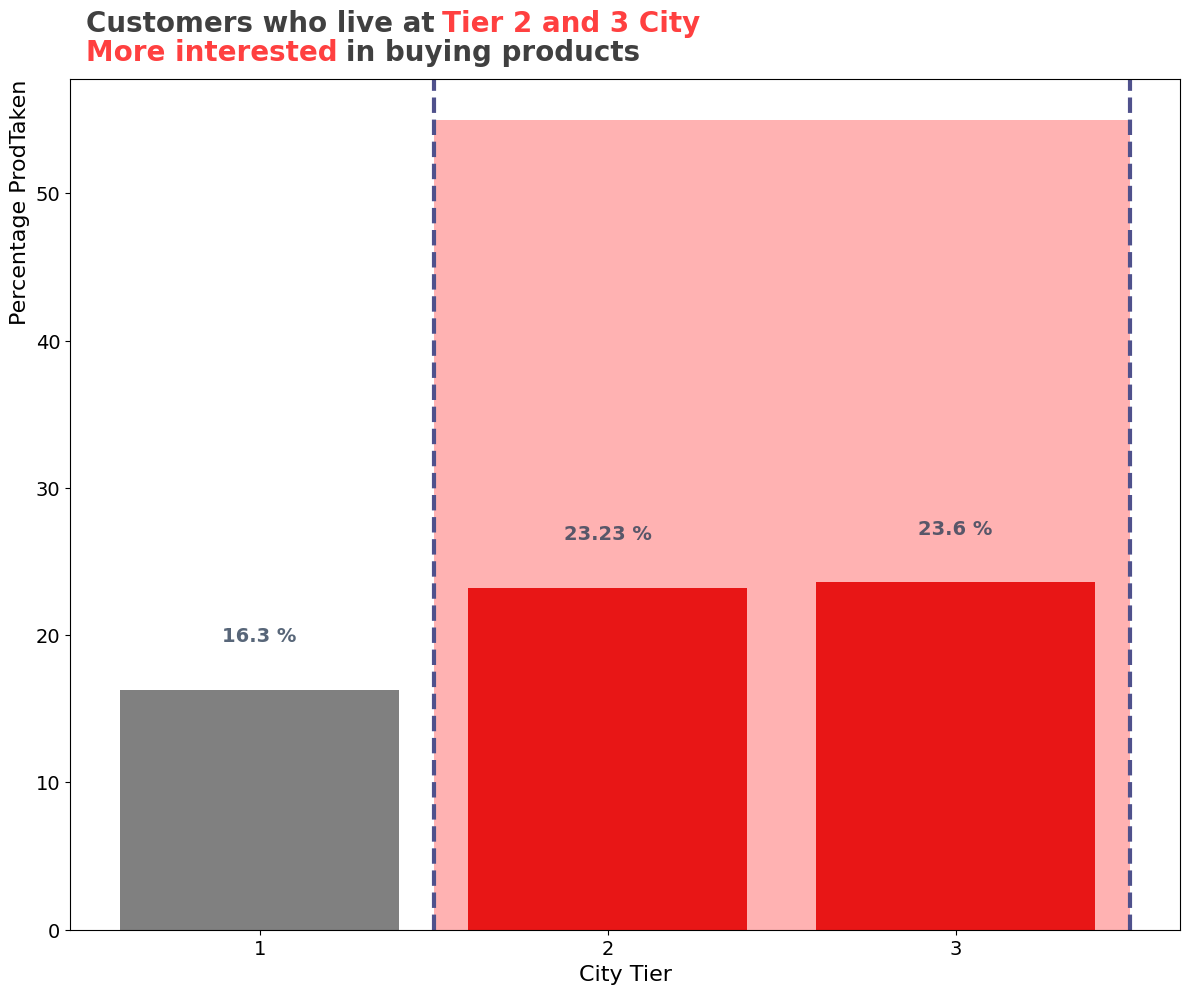

In [102]:
plt.figure(figsize=(12,10))

sns.barplot( x='CityTier',y='%',data=df_city, palette=['grey'])
sns.barplot( x='CityTier',y=[23.60,23.23,0],data=df_city, palette=['r'])

plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks(size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 2.6 ,1), [[55]], colors='rgb 144, 122, 214', alpha=0.3)

data_bars = df_city.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Customers who live at                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                                     Tier 2 and 3 City                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='More interested ', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='                           in buying products', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)

plt.tight_layout()
plt.show()


In [103]:
df_passport = df2.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df2.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['%']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='%',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,%
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


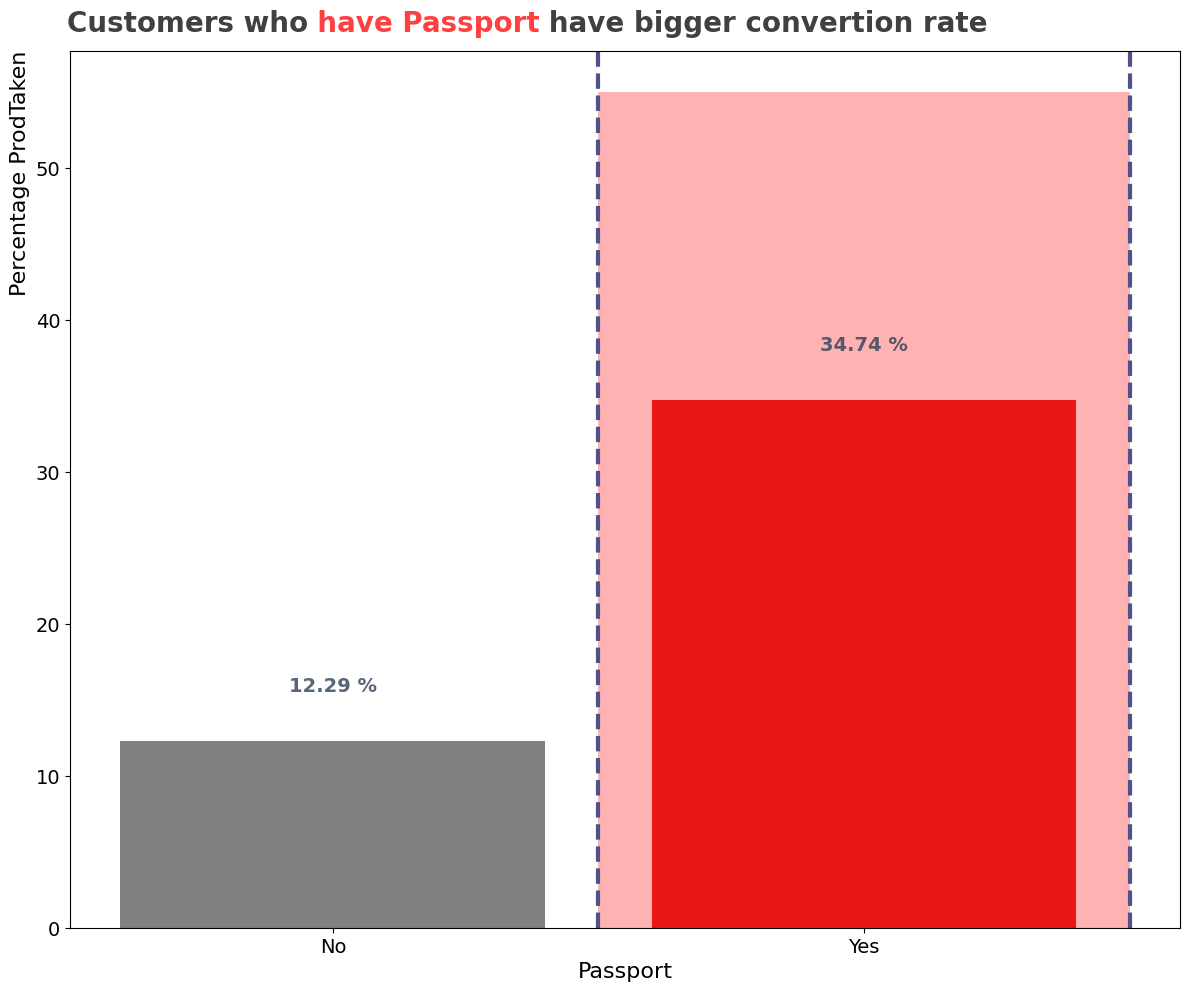

In [104]:
plt.figure(figsize=(12,10))

sns.barplot( x='Passport',y='%',data=df_passport, palette=['grey'])
sns.barplot( x='Passport',y=[34.74,0],data=df_passport, palette=['r'])

plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks([1,0],labels = ['Yes','No'],size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 1.6 ,1), [[55]], colors='rgb 144, 122, 214', alpha=0.3)

data_bars = df_passport.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s='Customers who                         have bigger convertion rate', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)
plt.text(s='                          have Passport', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')

plt.tight_layout()
plt.show()

In [105]:
# copy dataframe for preprocessing
df_prep = df.copy()

In [106]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


In [107]:
# counts missing data
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [108]:
# statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [109]:
# statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


In [110]:
# handling missing values
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [111]:
# check again if any missing values
print( df_prep.isnull().sum())

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


### Handling Duplicate Data

In [112]:
# remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(df_prep.shape[0])

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print( df_prep.shape[0])

4888
4747


### Handling Outlier

In [113]:
# view total rows before filtered
print(df_prep.shape[0])

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(df_prep.shape[0])

4747
4737


## Feature Engineering

### Feature Encoding

In [114]:
# view unique values on categorical columns
for col in df_prep.select_dtypes(include='object').columns:
    print(f'{col} : {df_prep[col].unique().tolist()}')
    print(df_prep[col].value_counts())
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited', 'Unknown']
TypeofContact
Self Enquiry       3346
Company Invited    1366
Unknown              25
Name: count, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Occupation
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: count, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Gender
Male      2829
Female    1908
Name: count, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
ProductPitched
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: count, dtype: int64
------------------------------------------
MaritalStatus : ['Unmarried', 'Divorced', 'Married']
MaritalStatus
Married      2277
Unmarried    1512
Divorced      948
Name: count, dty

In [115]:
# remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

# view dimension size of data before encoding
print(df_prep.shape[0] ,df_prep.shape[1] )

# label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# one hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True) #menggunakan drop first = True untuk mengurangi dimensi
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)
    
# view dimension size of data before encoding
print(df_prep.shape[0] ,df_prep.shape[1])

4735 19
4735 22


### Feature Extraction

In [116]:
# get correlation > +- 0.5
df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595
ProductPitched with MonthlyIncome has correlation : 0.678
Occupation_Salaried with Occupation_Small Business has correlation : -0.837
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.659


In [117]:
# create new column for feature
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [118]:
df_prep.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Married,MaritalStatus_Unmarried,TotalVisiting
0,1,41.000000,3,6.0,0,3.0,2,3.0,1.0,1,2,1,0,20993.0,True,False,True,False,False,True,3.0
1,0,49.000000,1,14.0,1,4.0,2,4.0,2.0,0,3,1,0,20130.0,False,False,True,False,False,False,5.0
3,0,33.000000,1,9.0,0,3.0,0,3.0,2.0,1,5,1,2,17909.0,False,False,True,False,False,False,3.0
4,0,37.622265,1,8.0,1,3.0,0,4.0,1.0,0,5,1,2,18468.0,True,False,False,True,False,False,2.0
5,0,32.000000,1,8.0,1,3.0,0,3.0,1.0,0,5,1,2,18068.0,False,False,True,False,False,True,4.0


## Split Train & Test Set

In [119]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [120]:
# splitting into data train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### Feature Transformation

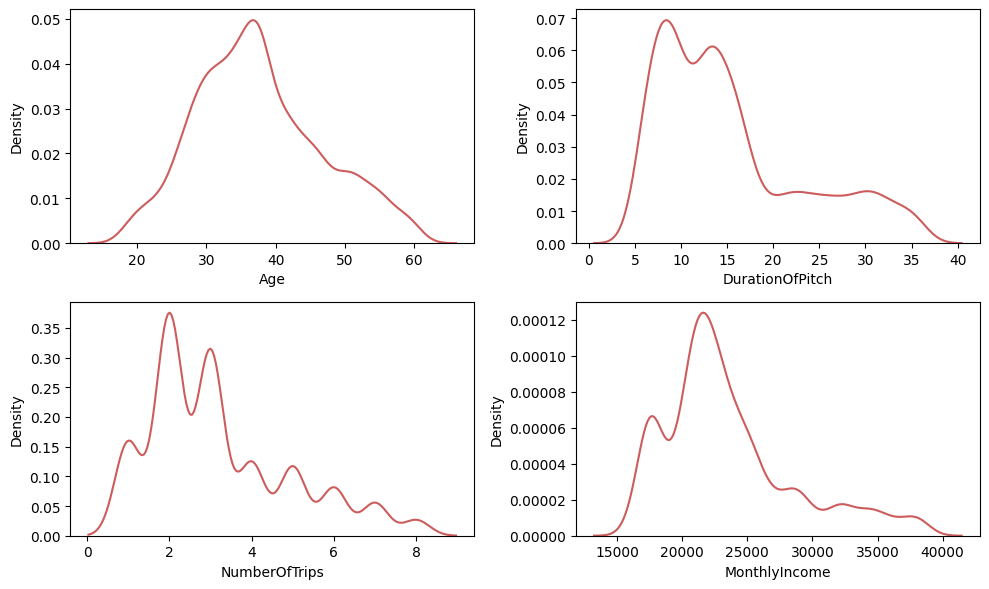

In [121]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [122]:
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))


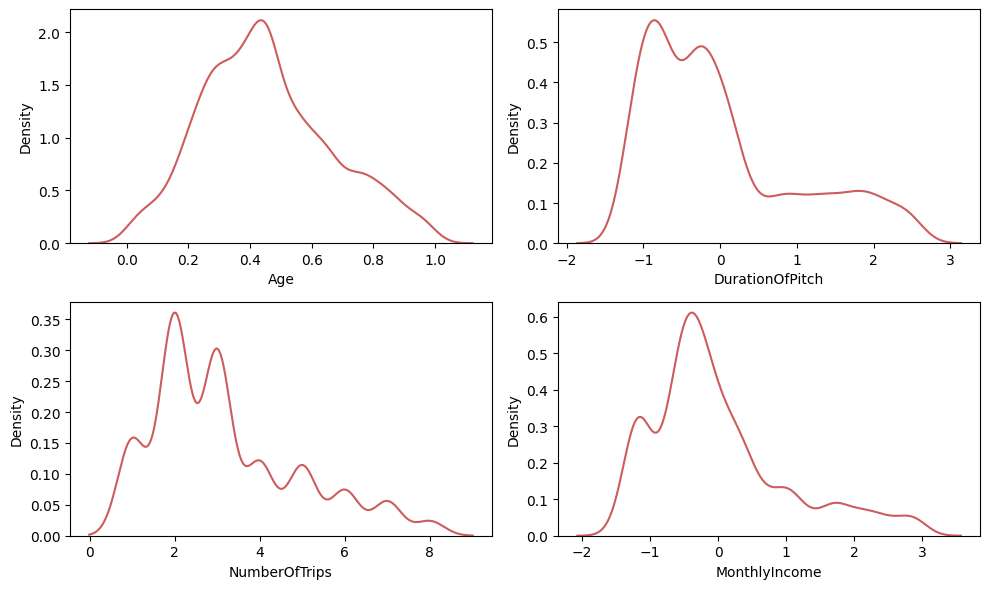

In [123]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [124]:
# statistics data after transformation
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3788.000000,3788.000000,3788.000000,3.788000e+03
mean,0.453387,0.000000,3.197202,-3.170056e-16
std,0.210871,1.000132,1.745316,1.000132e+00
min,0.000000,-1.283932,1.000000,-1.492633e+00
25%,0.302326,-0.788172,2.000000,-6.095633e-01
50%,0.441860,-0.292411,3.000000,-2.373719e-01
75%,0.581395,0.451230,4.000000,3.789695e-01
max,1.000000,2.558212,8.000000,2.991687e+00


### Feature Selection

In [125]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [126]:
# Feature selection using fclassif for numerical feature
nume_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome','TotalVisiting']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [127]:
# Feature selection using chi2 for categorical feature
cate_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [128]:
# merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(all_coll)

['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


In [129]:
# save file preprocessing into csv
X_train.to_csv('Travel_Preprocessing_train.csv', index=False)
X_test.to_csv('Travel_Preprocessing_test.csv', index=False)

## Model Selection

In [130]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(title)
    print(cm[1][1])
    print(cm[0][0])
    print(cm[0][1])
    print(cm[1][0])

### 1. Logistic Regression

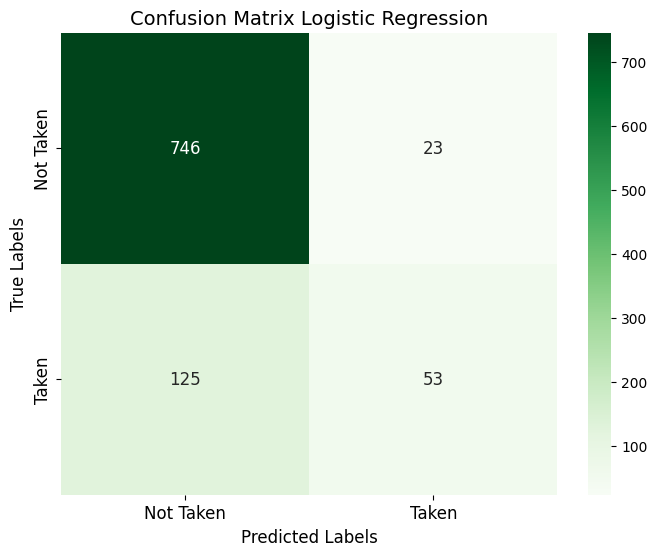

Logistic Regression
53
746
23
125


In [131]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

### 2. Decision Tree

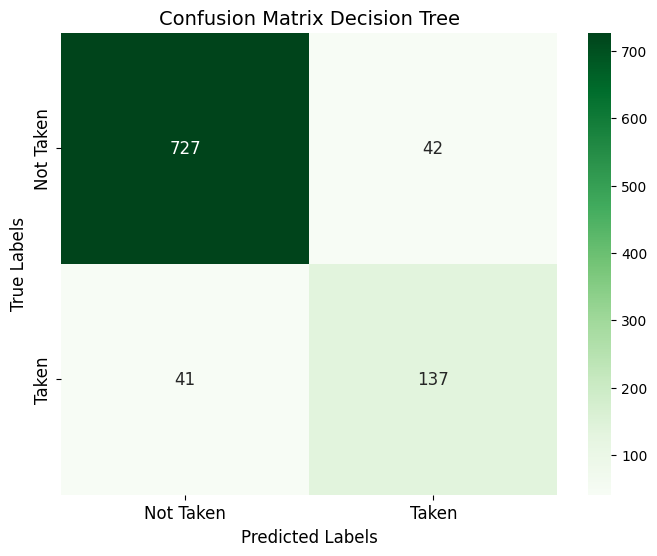

Decision Tree
137
727
42
41


In [132]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

### 3. Random Forest

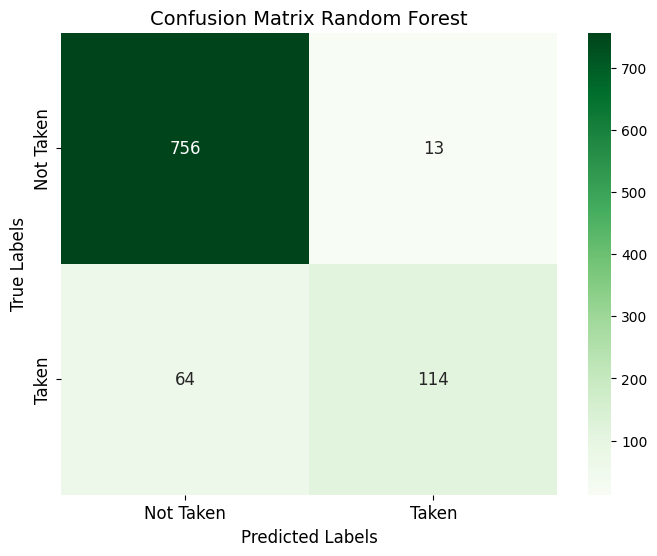

Random Forest
114
756
13
64


In [133]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

## Model Evaluation

In [134]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [135]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8437,0.6974,0.2978,0.4173,0.3852,0.8075,0.805
1,Decision Tree,0.9124,0.7654,0.7697,0.7675,0.7135,0.8575,1.000
2,Random Forest,0.9187,0.8976,0.6404,0.7475,0.7149,0.9581,1.000



- **Model Logistic Regression** 84.37%.
- **Model Decision Tree**  91.2%.
- **Model Random Forest** 91.87%.


In [136]:
model_rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

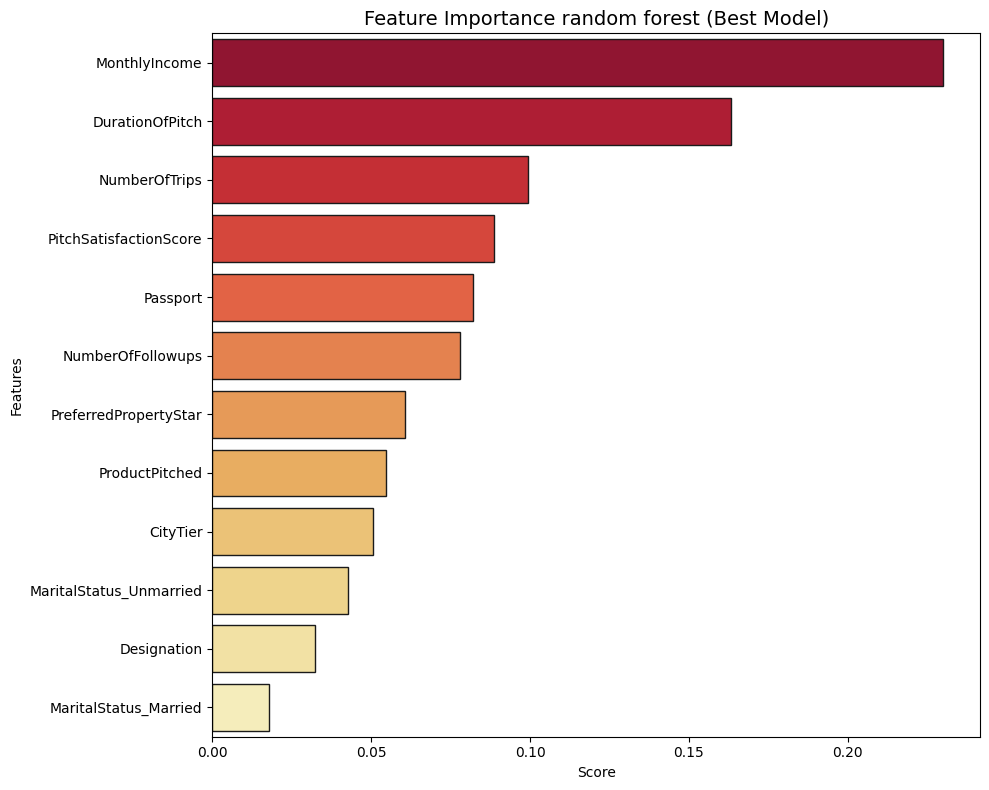

In [137]:
feature_importance_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns)
df_feature = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance random forest (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()

In [138]:
model_rf.predict([[-0.2924110339094919,4.0,4.0,-0.4787986757743633,1,2,3.0,0,5,0,False,True]])

array([0], dtype=int64)

In [139]:
model_rf.predict([[0.9469903272286477,6.0,3.0,-0.18785859265302005,1,0,5.0,1,4,2,False,True]])

array([1], dtype=int64)

In [140]:
df_final_test = X_test.copy()
df_final_test = X_test.copy()
best_model = model_rf
df_final_test['ProdTaken'] = y_test
df_final_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_final_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:,1]
df_final_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
3386,0.203350,4.0,5.0,0.440960,1,1,3.0,0,3,1,False,False,0,0,0.21
1649,-0.044531,3.0,2.0,-1.239323,1,0,3.0,0,1,2,False,True,0,0,0.04
3675,0.575170,4.0,8.0,0.137543,1,2,4.0,0,4,0,False,True,0,0,0.24
3517,2.558212,6.0,3.0,0.333021,1,2,4.0,0,1,0,False,False,0,0,0.15
1777,1.938511,4.0,4.0,0.696251,1,1,4.0,0,3,1,True,False,0,0,0.09


In [141]:
cost_per_person = 60 # in INR
cost_before = df_final_test[df_final_test.NumberOfFollowups!=0].shape[0]*cost_per_person
cost_after = df_final_test[(df_final_test.ProdTaken_Pred==1)].shape[0]*cost_per_person
cost_diff = cost_before - cost_after

print(f'Marketing costs required before using the model are {cost_before} INR')
print(f'Marketing costs required after using the model are {cost_after} INR')
print(f'So with the model we created we can reduce marketing costs by {cost_diff} INR or decrease by {round(cost_diff*100/cost_before,2)} %')

Marketing costs required before using the model are 56340 INR
Marketing costs required after using the model are 7620 INR
So with the model we created we can reduce marketing costs by 48720 INR or decrease by 86.47 %


In [142]:
y_train.to_csv('Travel_Preprocessing_ytrain.csv', index=False)
y_test.to_csv('Travel_Preprocessing_ytest.csv', index=False)